## **1. 숫자 필기 데이터 소개**

숫자 필기 데이터는 사이킷런 패키지에서 제공하는 분류용 예제 데이터입니다. 0~9까지 숫자를 손으로 쓴 이미지 데이터로 load_digits() 명령으로 로드할 수 있습니다. 각 이미지는 0~15까지 명암을 가지는 8 x 8 - 64 픽셀 해상도의 흑백 이미지입니다. 그리고 해당 이미지가 1797개가 있습니다.

load_digits()를 통해 이미지 데이터를 로드할 수 있습니다. 로드한 전체 데이터를 digits에 저장합니다.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits


digits = load_digits()

첫번째 샘플을 출력해보겠습니다. images[index]를 사용하면 해당 인덱스의 이미지를 행렬로서 출력할 수 있습니다.

In [2]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

첫번째 샘플이 8 x 8 행렬로 출력된 것을볼 수 있습니다. 0이 흰색이고 나머지가 검정입니다. 이를 토대로 위 행렬을 보면 대략적으로 0의 모양이 나옵니다. 실제 레이블을 확인해도 0이 나옵니다.

In [3]:
digits.target[0]

0

전체 샘플 중에서 상위 5개 샘플만 시각화하면 다음과 같이 나타납니다.

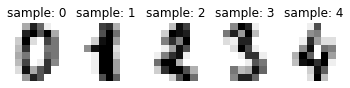

In [4]:
images_and_labels = list(zip(digits.images, digits.target))
for idx, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2, 5, idx + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [5]:
for i in range(5):
    print(i, '번 인덱스 샘플의 레이블 : ', digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


이제 훈련 데이터와 레이블을 각각 X, Y에 저장해봅시다. digits.images는 모든 샘플을 8 x 8 행렬로 저장하고 있습니다. 그러나 이보다 더 나은 방법은 digits.data를 사용하는 것입니다. 이는 8 x 8 행렬을 전부 64차원의 벡터로 변환하여 저장한 상태입니다. 

In [6]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

이를 토대로 X를 저장하고 레이블을 Y에 저장하겠습니다.

In [7]:
X = digits.data
Y = digits.target

## **2. 다층 퍼셉트론 분류기 만들기**

In [8]:
import torch
import torch.nn as nn
from torch import optim

In [9]:
model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer_1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer_1 = 32, hidden_layer_2 = 16
    nn.ReLU(),
    nn.Linear(16, 10), # hidden_layer_2 = 16, output_layer = 10
)

In [10]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [11]:
loss_fn = nn.CrossEntropyLoss() # 소프트맥스 함수를 포함한 비용 함수

In [12]:
optimizer = optim.Adam(model.parameters())
losses = []

for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X) # forward 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))
        
    losses.append(loss.item())

Epoch    0/100 Cost: 2.549368
Epoch   10/100 Cost: 2.113160
Epoch   20/100 Cost: 1.749240
Epoch   30/100 Cost: 1.381722
Epoch   40/100 Cost: 1.037535
Epoch   50/100 Cost: 0.755165
Epoch   60/100 Cost: 0.548614
Epoch   70/100 Cost: 0.405740
Epoch   80/100 Cost: 0.311158
Epoch   90/100 Cost: 0.247207


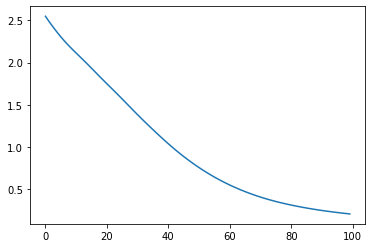

In [14]:
plt.plot(losses);